# Assignment #3 - Neural Networks

### <font color="red"> DUE: Oct 29 (Tuesday) 11:00 pm </font>  

<font color="blue"> Vaidehi Sonar </font>

# I. Overview

Describe the objective of this assignment. You can briefly state how you accompilsh it.

The aim of this assignment is to understand how neural network can be used for nonlinear regression and non linear logistic regression. The objective is to use NeuralNet class for regression and implement it on my regression dataset. 5-Fold Cross-validation will be explained and used to find best neural network parameters and CV ccuracies will be reported. Similarly, Non-Linear Logistic Regression will also be implemented and this model will be applied on toy data and also on my own classification dataset.

In [2]:
import numpy as np 
from abc import ABC, abstractmethod
from sklearn import preprocessing
from sklearn.utils import shuffle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import r2_score
import scipy.optimize as opt
from scipy.optimize import rosen, minimize
from grad import scg,steepest
from copy import copy
from sklearn.metrics import mean_squared_error
from nn import NeuralNet
%matplotlib inline

# II. Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the data that you examined in Assignment #1 (of course for regression). 

It is dataset that contains house sale prices for King County, which includes Seattle. It includes homes that were sold between May 2014 and May 2015. It has been taken from Kaggle. It has 21 features out of which 19 are house features and the remaining are id and the target value i.e. the price. The dataset consists of 21k+ data samples. Following are the features:<br/>
**id**: a notation for a house<br/>
**date**: Date house was sold<br/>
**price**: Price is prediction target<br/>
**bedrooms**: Number of Bedrooms/House<br/>
**bathrooms**: Number of bathrooms/House<br/>
**sqft_living**: square footage of the home<br/>
**sqft_lotsquare**: footage of the lot<br/>
**floorsTotal**: floors (levels) in house<br/>
**waterfront**: House which has a view to a waterfront<br/>
**view**: Has been viewed<br/>
**condition**: How good the condition of the house is ( Overall )<br/>
**grade**: overall grade given to the housing unit, based on King County grading system<br/>
**sqft_above**: square footage of house apart from basement<br/>
**sqft_basement**: square footage of the basement<br/>
**yr_built**: Year when house was built<br/>
**yr_renovated**: Year when house was renovated<br/>
**zipcode**: zipcode<br/>
**lat**: Latitude coordinate<br/>
**long**: Longitude coordinate<br/>
**sqft_living15**: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area<br/>
**sqft_lot15**: lotSize area in 2015(implies-- some renovations)<br/>

In [3]:
reg_df = pd.read_csv('kc_house_data.csv')
reg_df.info()
reg_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


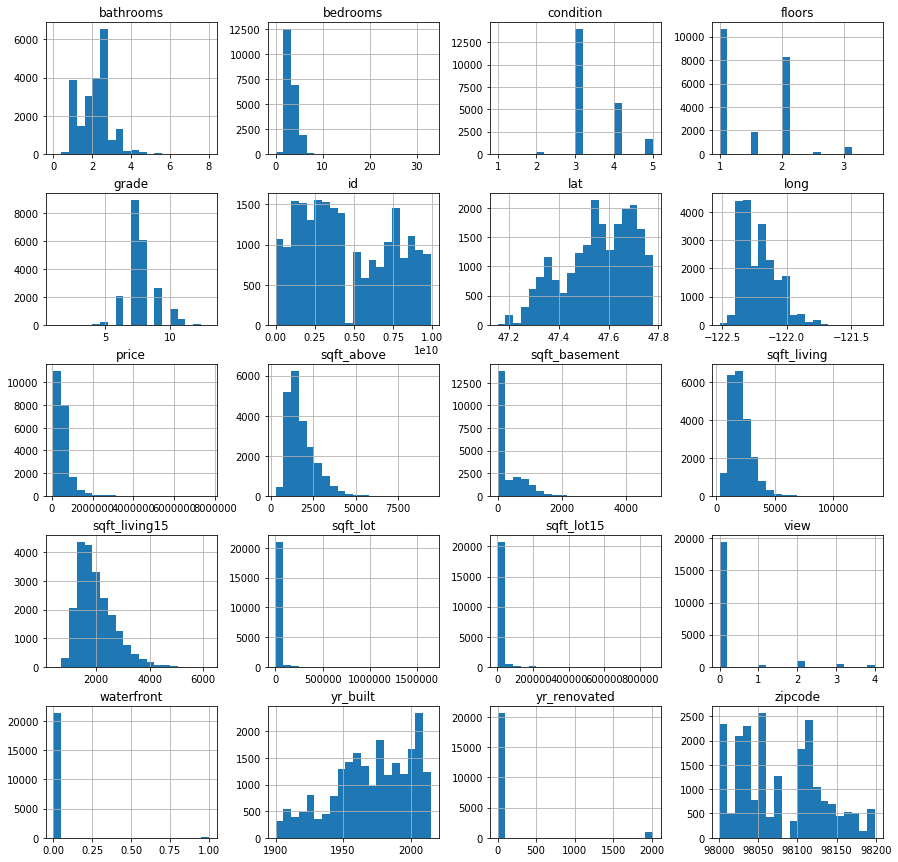

In [4]:
reg_df.hist(bins=20,figsize=(15,15)) 
plt.show()

In [5]:
corr_matrix=reg_df.corr()
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


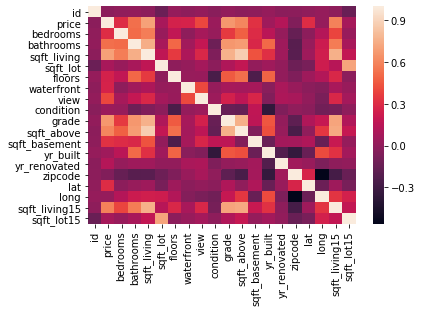

In [6]:
ht_map=sns.heatmap(corr_matrix)

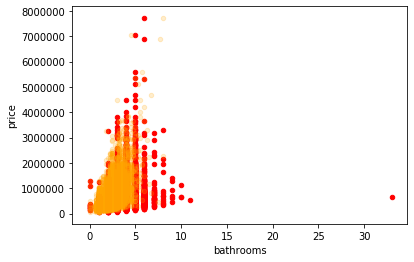

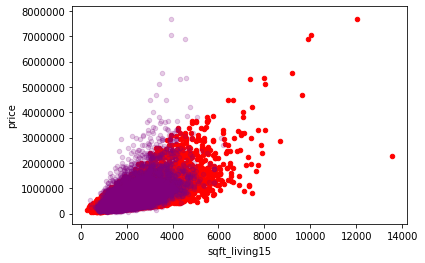

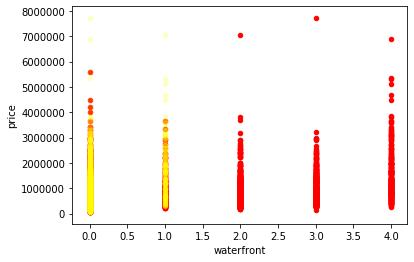

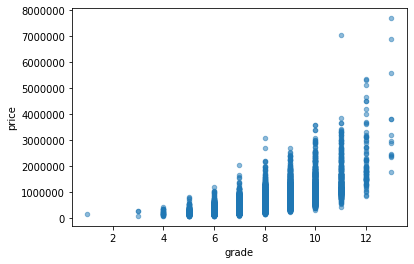

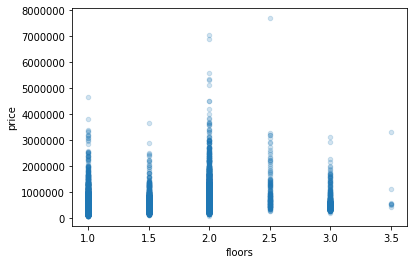

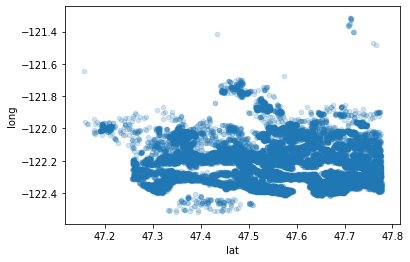

In [7]:
ax1 = reg_df.plot(kind='scatter', x='bedrooms', y='price', color='r')    
ax2 = reg_df.plot(kind='scatter', x='bathrooms', y='price', color='orange', alpha=0.2,ax=ax1)    
ax3 = reg_df.plot(kind='scatter', x='sqft_living', y='price', color='r')    
ax4 = reg_df.plot(kind='scatter', x='sqft_living15', y='price', color='purple',alpha=0.2, ax=ax3)    
ax5 = reg_df.plot(kind='scatter', x='view', y='price', color='r')    
ax6 = reg_df.plot(kind='scatter', x='waterfront', y='price', color='yellow',alpha=0.2, ax=ax5) 
reg_df.plot(kind="scatter",x="grade",y="price", alpha=0.5 )
reg_df.plot(kind="scatter",x="floors",y="price", alpha=0.2 )
reg_df.plot(kind="scatter",x="lat",y="long", alpha=0.2)

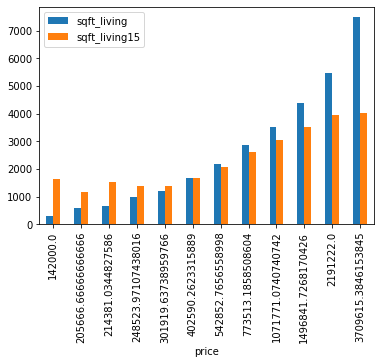

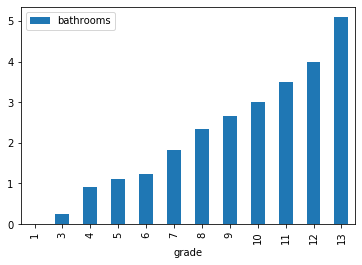

In [8]:
reg_df1=reg_df.groupby(['grade']).mean()
bar = reg_df1.plot.bar(x='price',y=['sqft_living','sqft_living15'])
bar1 = reg_df1.plot.bar(y='bathrooms')

### Preliminary Observation

#### Heat Map or correlation matrix:

- It is observed that there is quite strong correlation between number of bathrooms and grade. Features like bathrooms, bedrooms, grade, sqft_living before and after renovation are relevant to price change for the houses.
- Features like condition of the house, year built, zipcode does not affect the price much.
- Correlation is also observed between number of floors,bathrooms and year built.


#### Histograms:

- Many hsitograms are tail-heavy. They extend much further to the right of the median than to the left.

#### Scatter Plots:

- The prices of houses are for 2-5bedrroms and 1-4 bathrooms lie between the range 1000000-4000000.
- It seems like price is linearly dependent on Sqft_living i.e as the sqft increases price increases. It is still linearly increasing even after renovation given by sqft_living15.
- Grade and price is not a linear relation. It is a polynomial curve with one or two outliers.
- Most of the houses are located at the latitude between 47.25 and 47.75 and between longitude -122.4 and -121.8 with some outliers. 
- Waterfront houses does not have any relevance in price prediction. Although prices for view and waterfront houses seem to overlap.

#### Bar Plot:

- It compares the price change before and after renovation.
- An interesting pattern that can be seen is that before renovation/without renovation the price of the houses increases pretty drastically with respect to sqft_living whereas after renovation the prices increase more gradually with sqft_living.
- It can be seen that grade is linearly dependent on number of bathrooms.As number of bathroom increases grade also increases.


In [9]:
df_tar= pd.DataFrame(reg_df['price'])
reg_dfn = reg_df.drop(columns =['price'])
dfn = pd.DataFrame(reg_dfn, index=reg_dfn.index,columns = reg_dfn.columns)
df = reg_dfn.drop(columns=['date','id','zipcode','view','condition','waterfront','sqft_lot','sqft_lot15','yr_renovated','sqft_above','sqft_basement'],axis =1)
df.head()

,bedrooms,bathrooms,sqft_living,floors,grade,yr_built,lat,long,sqft_living15
0,3,1.00,1180,1.0,7,1955,47.5112,-122.257,1340
1,3,2.25,2570,2.0,7,1951,47.7210,-122.319,1690
2,2,1.00,770,1.0,6,1933,47.7379,-122.233,2720
3,4,3.00,1960,1.0,7,1965,47.5208,-122.393,1360
4,3,2.00,1680,1.0,8,1987,47.6168,-122.045,1800


### Summary

#### Neural Networks:

Neural Network is a model that is inspired by the biological network of neurons inside our brains. A neural network consists of input layer, hidden layers and an output layer. The input layer consists of nodes that are the features or attributes of the dataset and the output layer consists of nodes that is the output which maybe either a real value or maybe a classthat an entry belongs to. Hidden layer is the one that performs all sorts of operations on the features taked from the input layer. The result of these operations is given to the output layer. This process is know as forward propagation. The predicted results are then compared with the actual values and then the error is calculated. So, by backward propagation the weights are updated based on these errors.

#### Non Linear Regression:

Simple linear regression is prediction of real numbers on the basis of variables that are linearly dependent or forms a straight line y = mx + c , whereas nonlinear regression is a form of regression analysis in which data is fit to a model  which will generate a curve. Sum of squares is used to check how our observations are varying from the mean of the data set.The goal is to minimize the sum of squares. Smaller the sum of squares, better the model.

#### Cross Validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. Cross validation divides the data in K approximately equal parts(k-folds). In each iteration a part is selected as the hold out or test dataset andthe remaining part as the train dataset. Fit the model with the parameter lambda on the train data and evaluate it on the test data. By doing this for different values of lambda, we can find the best lambda.<br>
We usually use 5-fold or 10-fold Cross validation. We are using 5-fold cross validation for the assignment.

#### Activation Functcion

The activation function performs the nonlinear transformation of the input, giving the model the ability to learn. There are several activation functions like tanh, ReLu, Leaky ReLu, Sigmoid, step function, etc. that can be used based on different scenarios. 


### NEURAL NETWORK

In [10]:
class Standardizer: 
    """ class version of standardization """
    def __init__(self, X, explore=False):
        self._mu = np.mean(X,0)  
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))

    def set_sigma(self, s):
        self._sigma[:] = s

    def standardize(self,X):
        return (X - self._mu) / self._sigma 

    def unstandardize(self,X):
        return (X * self._sigma) + self._mu 

In [11]:

"""" Neural Network 
        referenced NN code by Chuck Anderson in R and C++ 

                                by Jake Lee (lemin)

    example usage:
        X = numpy.array([0,0,1,0,0,1,1,1]).reshape(4,2)
        T = numpy.array([0,1,1,0,1,0,0,1]).reshape(4,2)

        nn = nnet.NeuralNet([2,3,2])
        nn.train(X,T, wprecision=1e-20, fprecision=1e-2)
        Y = nn.use(X)

"""

class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):

        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end
        #print("_W",self._W)
        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            #print("shape of t ", t.shape)
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
                
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                #print(t)
                #t = self.RBF(np.dot(np.hstack((np.ones((t.shape[0],1)),t)),self._W[i]))
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

### Explanation of Codes

There are two classes - Standardizer class and NeuralNet class.<br>
The Standardizer class normalizes all the values whereas NeuralNet class builds the neural network that learns the data through feed forward and back propagation.<br>
The nunits takes the number of inputs, hidden units, and outputs.The set_hunit function is used to either update or initialize the weights. It takes the weight as parameter.The Pack function packs the multiple weights of each layer into one vector. The unpack function does vice versa.<br>
Forward pass in neural network propagates as shown below:

$$
\begin{align}
Z &amp;= h(Xl \cdot V) \\
\\
Y &amp; = Zl \cdot W 
\end{align}
$$

Activation function is used to make the network nonlinear.<br>
In the backward pass the function takes the the z values, Target values and the error as input. Based on the delta value, the weights and the bias are updated accoringly. This method returns the weight vector packed together of that particular layer. Below are the functions that are excecuted during backward pass:

$$
\begin{align}
V &amp;\leftarrow V + \alpha_h \frac{1}{N} \frac{1}{K} Xl^\top \Big( (T - Y) W^\top \odot (1 - Z^2) \Big) \\
W &amp;\leftarrow W + \alpha_o \frac{1}{N} \frac{1}{K} Zl^\top \Big( T - Y \Big) 
\end{align}
$$

The train function takes the feautures and the target as the input. The gradientf unpacks the weights, proceeds with the forward pass by calling forward function. Now error is calculated using results of forward pass. Now back propagation is proceeded by calling backward function with parameters as error, Z, T(Target), _lambda. The optimtarget function tries to minimize the error by using the object function and updates the weights accordingly. The use function is used to apply the model to the test data after training. Test data is passed as parameter and it standardizes the data. Then forward is applied on the data which returns the predictions.<br>
_nLayers is the number of hidden unit layers.<br>
rho is the learning rate attribute of the class.<br>
_W is the weights.<br>
_weights is the weights that is _W written in one dimension.<br>
stdX is the standardization class for the data.<br>
stdT is the standardization class for the target.

### Cross Validation

In [12]:
def split(data):
    part = len(data) / 5.0
    data_list = []
    x = 0.0
    #Iterate through the length of s and keep on appending to myList so we've like 5 parts now and return the list
    while x < len(data):
        data_list.append(data[int(x):int(x + part)])
        x += part
    return data_list

best_paramlist=[]
final_list=[]

def cross_validate(X, T, parameters):
    #Call Split and get the data partitioned
    X_partitioned = split(X)
    T_partitioned = split(T)
    
    #This loop iterates through all the 5 parts..so each i is like test data for the paritioned dataset 
    for i in range(5): 
        print("Test number: ",i)
        X_test = X_partitioned[i]
        T_test = T_partitioned[i]

        history_rmse=[]
        params=[] 
        #best_param
        
        #k is the validation part of the 5 parts
        for k in range(5): 
            print("K is : ",k)
            if i == k: 
                continue 
            
            #Another 20% of data used
            X_val = X_partitioned[k]
            T_val = T_partitioned[k]
            
            #Train will be those which is not test and validation part. The remaining 60% of data of 100%
            X_train = X_partitioned[not i and not k]
            T_train = T_partitioned[not i and not k]
            
            #m = 0
            paramlist=[]
            rmselist=[]
            for param in parameters:
                
                model = NeuralNet(param)
                model.train(X_train, T_train)
                pred = model.use(X_val)
                
                valid_err = np.sqrt(mean_squared_error(T_val, pred))
                rmselist.append(valid_err)
                paramlist.append(param)
                
            print(paramlist)
            print(rmselist)
            print(min(rmselist))
            print(paramlist[np.argmin(rmselist)])
            history_rmse.append(min(rmselist))
            params.append(paramlist[np.argmin(rmselist)])
         
        print(params)
        print(history_rmse)
        print(paramlist[np.argmin(history_rmse)])
        best_param=paramlist[np.argmin(history_rmse)]
        best_model = NeuralNet(best_param)
        
        X_train = X_partitioned[not i]
        T_train = T_partitioned[not i]
        best_model.train(X_train, T_train)

        final_pred = best_model.use(X_test)
        final_err = np.sqrt(mean_squared_error(T_test, final_pred))
        final_list.append(final_err)
        best_paramlist.append(best_param)

    return final_list,best_paramlist


### Explanation of Codes

The split function is used to divide the data into parts or folds. In this code, split function will split parts of 20% of whole data. So data_list will give five 20% of 100% of data. We iterate through the length of s(data) and keep on appending to data_List so we've like 5 parts now and we will return the list.<br>
The cross_validate function takes X which contains the sample, T which contains the target values of the samples and model parameters as input. This function returns final_list and best_paramlist. This function first divides data into 5 partitions using split() function. These partitions are stored into X_partitioned and T_partitioned. These are nothing but lists. Each element of these lists are 20% of the original data size.<br>
Now for loop iterates through all the 5 parts and i is like test data's index of X_partitioned and T_parititoned lists. The remaining data is used as training set. Now inside for loop X_test and T_test are declared using X_paritioned[i], T_partitioned[i].<br>
k is the validation part of the 5 parts. Excluding k and i the rest data is our training set.In each validation loop we are training data with our different parameters passed and evaluating on validation data. Each parameter returns rmse value and this is appended to rmselist, parameters respective to that rmse are appended into paramlist to keep track of indices. Now after each validation we are selecting the parameter that produced minimum rmse value and storing the results into history_rmse and params list.<br>
From this history_rmse list we are picking one with best results. Now I retrain the model with the best parameter param in parameters and applied the model to test set. This test accuracy is appended to final_list and parameters are appended to best_paramlist. This operation runs for 5 folds and cross validate function returns final_list and best_paramlist which are best Accuracies of each test and best Params of each test.<br>
From this results we choose the parameters that is repeated more number of times in best_paramlist.

### Presentation of CV Results

In [13]:
models = [[9,3,1],[9,5,1],[9,7,1], [9,9,1], [9,10,1]]
bestAccuracy,bestParam = cross_validate(np.array(df), np.array(df_tar), models)

Test number:  0
K is :  0
K is :  1


F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is dep

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 9, 1], [9, 10, 1]]
[190394.6239985261, 200315.72660035465, 181544.91307720827, 178681.07617609118, 178767.00435028924]
178681.07617609118
[9, 9, 1]
K is :  2


F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is dep

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 9, 1], [9, 10, 1]]
[191552.40430900466, 184459.61112035377, 170560.94790639318, 167469.04667344352, 168022.38807706808]
167469.04667344352
[9, 9, 1]
K is :  3


F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is dep

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 9, 1], [9, 10, 1]]
[199544.70082248576, 190251.56775144144, 172313.18686347955, 176146.53622964898, 170779.45071043872]
170779.45071043872
[9, 10, 1]
K is :  4


F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is dep

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 9, 1], [9, 10, 1]]
[224079.2932842433, 220088.59939134747, 190408.28731876003, 182452.48799063478, 183872.6510123537]
182452.48799063478
[9, 9, 1]
[[9, 9, 1], [9, 9, 1], [9, 10, 1], [9, 9, 1]]
[178681.07617609118, 167469.04667344352, 170779.45071043872, 182452.48799063478]
[9, 5, 1]


F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Test number:  1
K is :  0


F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is dep

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 9, 1], [9, 10, 1]]
[183107.33108074643, 167080.25270422586, 147218.0914061198, 144710.3782530061, 136628.85471240946]
136628.85471240946
[9, 10, 1]
K is :  1
K is :  2


F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is dep

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 9, 1], [9, 10, 1]]
[191540.94211144635, 170979.4303205088, 164761.4956872305, 174042.83533509515, 176204.33500619134]
164761.4956872305
[9, 7, 1]
K is :  3


F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is dep

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 9, 1], [9, 10, 1]]
[199537.33792073536, 189610.71426762242, 177053.00511609679, 173379.26953719545, 169217.62710921981]
169217.62710921981
[9, 10, 1]
K is :  4


F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is dep

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 9, 1], [9, 10, 1]]
[221582.8769071078, 191863.8604821611, 178908.25014670673, 176603.3436181587, 173141.0581315717]
173141.0581315717
[9, 10, 1]
[[9, 10, 1], [9, 7, 1], [9, 10, 1], [9, 10, 1]]
[136628.85471240946, 164761.4956872305, 169217.62710921981, 173141.0581315717]
[9, 3, 1]


F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Test number:  2
K is :  0


F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is dep

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 9, 1], [9, 10, 1]]
[179270.86758239844, 153509.3817133466, 145245.45519365201, 138630.45562304315, 141032.2400736059]
138630.45562304315
[9, 9, 1]
K is :  1


F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is dep

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 9, 1], [9, 10, 1]]
[213095.21583770777, 187557.3965189514, 184941.19312896632, 175600.0524041044, 172294.2949836821]
172294.2949836821
[9, 10, 1]
K is :  2
K is :  3


F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is dep

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 9, 1], [9, 10, 1]]
[189010.53084462023, 181354.74359046223, 175362.86566684296, 165104.16509701658, 161236.43378283945]
161236.43378283945
[9, 10, 1]
K is :  4


F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is dep

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 9, 1], [9, 10, 1]]
[223123.37003483085, 209074.39561271493, 178659.3038530714, 180261.91996524433, 174491.51294897622]
174491.51294897622
[9, 10, 1]
[[9, 9, 1], [9, 10, 1], [9, 10, 1], [9, 10, 1]]
[138630.45562304315, 172294.2949836821, 161236.43378283945, 174491.51294897622]
[9, 3, 1]


F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Test number:  3
K is :  0


F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is dep

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 9, 1], [9, 10, 1]]
[177987.0814189557, 161068.9674299815, 143216.96506678435, 140125.95715818094, 135062.21390167405]
135062.21390167405
[9, 10, 1]
K is :  1


F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is dep

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 9, 1], [9, 10, 1]]
[212545.4618731661, 196275.12572053683, 196335.03027005406, 198146.56437227194, 171299.15421356255]
171299.15421356255
[9, 10, 1]
K is :  2


F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is dep

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 9, 1], [9, 10, 1]]
[191043.06294118837, 173586.15347272795, 155721.37096939157, 159304.55116014148, 173789.44903680077]
155721.37096939157
[9, 7, 1]
K is :  3
K is :  4


F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is dep

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 9, 1], [9, 10, 1]]
[222258.34294477032, 204055.39229384216, 195653.1406206139, 175265.7417760116, 172835.9006783844]
172835.9006783844
[9, 10, 1]
[[9, 10, 1], [9, 10, 1], [9, 7, 1], [9, 10, 1]]
[135062.21390167405, 171299.15421356255, 155721.37096939157, 172835.9006783844]
[9, 3, 1]


F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Test number:  4
K is :  0


F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is dep

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 9, 1], [9, 10, 1]]
[169776.17385836277, 154918.42034373773, 143065.69745686054, 143628.72983533563, 139931.8924383686]
139931.8924383686
[9, 10, 1]
K is :  1


F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is dep

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 9, 1], [9, 10, 1]]
[190423.12267431724, 155801.76622386702, 189676.46125027293, 174457.9139272299, 185427.52801008124]
155801.76622386702
[9, 5, 1]
K is :  2


F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is dep

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 9, 1], [9, 10, 1]]
[192272.82545264528, 178933.3149788739, 166318.19525957547, 156917.87252638317, 170987.9767900869]
156917.87252638317
[9, 9, 1]
K is :  3


F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is dep

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 9, 1], [9, 10, 1]]
[199518.3369030698, 190155.85496336973, 173502.19396675413, 171925.81604507912, 168812.9616753467]
168812.9616753467
[9, 10, 1]
K is :  4
[[9, 10, 1], [9, 5, 1], [9, 9, 1], [9, 10, 1]]
[139931.8924383686, 155801.76622386702, 156917.87252638317, 168812.9616753467]
[9, 3, 1]


F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [14]:
print(bestAccuracy,bestParam)

[169285.82675113055, 189859.8443663813, 209378.3285106087, 186656.47398358362, 209183.58905603958] [[9, 5, 1], [9, 3, 1], [9, 3, 1], [9, 3, 1], [9, 3, 1]]


In [15]:
X_train,X_test,t_train,t_test = model_selection.train_test_split(np.array(df),np.array(df_tar),test_size=0.30,random_state=40)

In [70]:
model=NeuralNet([9,3,1])  
#choosing parameters which occured more number of times on the final parameter list
#because those are the list with mininmum rmse
model.train(X_train,t_train,niter=1000)

F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


{'w': array([ 1.32697451,  0.54226188, -0.4385538 ,  0.02482159,  0.0818761 ,
        -0.09615037, -0.03480142, -0.06343462,  0.06500221, -0.10605814,
         0.15959818, -0.04228242, -0.0143856 , -0.33481607,  0.26785548,
        -0.12792449, -0.08934641,  0.11519733,  0.0706506 ,  0.07117512,
        -0.14154398, -0.0872413 , -0.45383517,  0.42154563,  0.13802829,
        -3.08337092,  2.75361091, -0.03066233, -0.22303324,  0.24521539,
         6.3347847 , -7.44915334,  3.33938893,  3.6261534 ]),
 'f': 0.115510176685405,
 'reason': 'reached limit of nIterations',
 'wtrace': None,
 'ftrace': None}

In [71]:
t_pred=model.use(X_test)

In [72]:
from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(mean_squared_error(t_test, t_pred)))
print('R squared value:', r2_score(t_test, t_pred))

RMSE: 173661.52465701636
R squared value: 0.7654073662897033


### Plotting the Results

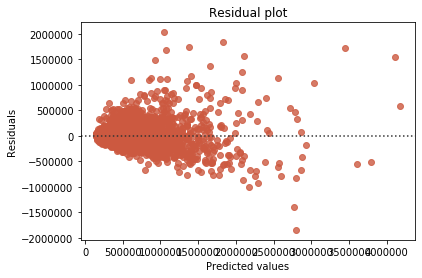

In [19]:
sns.residplot(t_pred.flatten(), t_test.flatten(), color=(0.8, 0.35, 0.25))
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals');

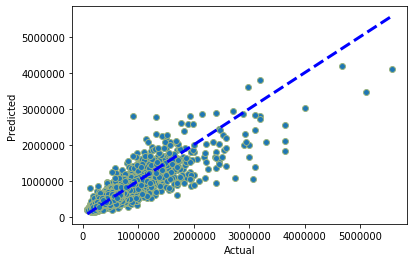

In [20]:
fig, ax = plt.subplots()
ax.scatter(t_test, t_pred, edgecolors=(0.6,0.7,0.5))
ax.plot([t_test.min(), t_test.max()], [t_test.min(), t_test.max()],'b--', lw=3)
ax.set_ylabel('Predicted')
ax.set_xlabel('Actual')
plt.show()

Text(0.5, 1.0, 'NN model predictions')

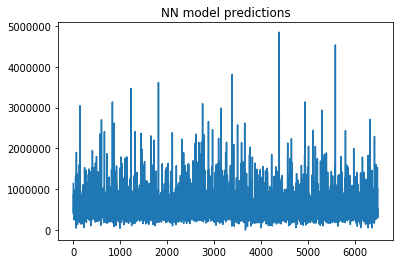

In [73]:
plt.plot(t_pred)
plt.title("NN model predictions")

### Explanation of CV results

In this assignment I built 3 layer neural network. Input layer has 9 nodes because I have taken 9 features from my data. Output layer has 1 node.I've not only used 3 layer. But I repeated the process with many layers and it was interesting to find that 3 layers give better results than any more.<br>

I tried for the best network structure by changing the number of nodes in hidden layer. I performed 5 fold cross validation by passing my models variable as [[9,3,1],[9,5,1],[9,7,1], [9,9,1], [9,10,1]]. Here first value represents input nodes, second value represents nodes in hidden layer, third value represents output nodes. From the results of cross validation we can see that model [9, 3, 1] has appeared more number of times.<br>

The model with number of nodes in hidden layer 3 works better. With more number of nodes in hidden layer network its overfitting the data. Hence, I've used [9,3,1] as the final structure.<br>

### Discussions about Prediction results

In this assignment I have performed regression analysis using Neural network which is non linear regression problem. On training the model using NeuralNet with optimum structure [9,3,1], model has produced a RMSE: 174900.56857632755
R squared value: 0.7620478712239073 for 1000 iterations.<br> 

Its our choiceto choose number of hidden layers that suits our problem. Each node is connected to a activation function which makes the network more powerful. I used tanh as activation function. The gradient is updating the weights in each layer during back propagation which made network work so well.

## Nonlinear Logistic Regression

### Data

It is a dataset of a third-party travel insurance servicing company that is based in Singapore. The dataset has been taken from kaggle Following are the arrtributes:<br/>
**Target**: Claim Status (Claim.Status)<br/>
Name of agency(Agency)<br/>
Type of travel insurance agencies (Agency.Type)<br/>
Distribution channel of travel insurance agencies (Distribution.Channel)<br/>
Name of the travel insurance products (Product.Name)<br/>
Duration of travel (Duration)<br/>
Destination of travel (Destination)<br/>
Amount of sales of travel insurance policies (Net.Sales)<br/>
Commission received for travel insurance agency (Commission)<br/>
Gender of insured (Gender)<br/>
Age of insured (Age)<br/>

#### Pre-processing
Data Pre-processing required. Categorical values are changed to numerical values using label_encoder() and get dummies() from pandas. Gender column has been dropped due to large number of null values(71% of null values).

In [22]:
le = preprocessing.LabelEncoder()
cls_df = pd.read_csv('travel insurance.csv')
cls_df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41


In [23]:
cls_df.info()
cls_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 10 columns):
Agency                  63326 non-null object
Agency Type             63326 non-null object
Distribution Channel    63326 non-null object
Product Name            63326 non-null object
Claim                   63326 non-null object
Duration                63326 non-null int64
Destination             63326 non-null object
Net Sales               63326 non-null float64
Commision (in value)    63326 non-null float64
Age                     63326 non-null int64
dtypes: float64(2), int64(2), object(6)
memory usage: 4.8+ MB


,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [24]:
cls = cls_df.apply(le.fit_transform)
cls.head()


,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,3,1,0,12,0,188,79,105,396,80
1,3,1,0,12,0,188,79,105,396,70
2,6,1,1,16,0,67,4,80,716,31
3,6,1,1,16,0,62,4,91,646,31
4,6,1,1,16,0,81,61,120,442,40


In [25]:
corr_mat=cls.corr()
corr_mat

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
Agency,1.000000,0.207529,-0.191928,0.138890,-0.121685,-0.132776,-0.208348,-0.203385,-0.229593,0.136656
Agency Type,0.207529,1.000000,-0.076895,-0.272308,-0.098706,-0.124697,-0.150909,-0.090091,-0.422238,-0.209233
Distribution Channel,-0.191928,-0.076895,1.000000,-0.155318,-0.000798,-0.058109,-0.052289,-0.014495,-0.054692,-0.164432
Product Name,0.138890,-0.272308,-0.155318,1.000000,0.000679,-0.088026,-0.069257,-0.097530,0.521728,0.249311
Claim,-0.121685,-0.098706,-0.000798,0.000679,1.000000,0.099759,0.047105,0.107731,0.100080,-0.012387
Duration,-0.132776,-0.124697,-0.058109,-0.088026,0.099759,1.000000,0.088793,0.381276,0.307109,0.004256
Destination,-0.208348,-0.150909,-0.052289,-0.069257,0.047105,0.088793,1.000000,0.006268,-0.031414,-0.028951
Net Sales,-0.203385,-0.090091,-0.014495,-0.097530,0.107731,0.381276,0.006268,1.000000,0.359348,0.035174
Commision (in value),-0.229593,-0.422238,-0.054692,0.521728,0.100080,0.307109,-0.031414,0.359348,1.000000,0.204648
Age,0.136656,-0.209233,-0.164432,0.249311,-0.012387,0.004256,-0.028951,0.035174,0.204648,1.000000


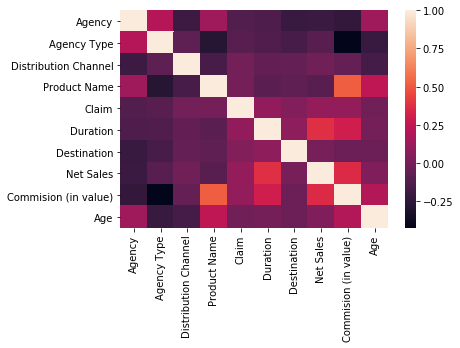

In [26]:
heat_map=sns.heatmap(corr_mat)

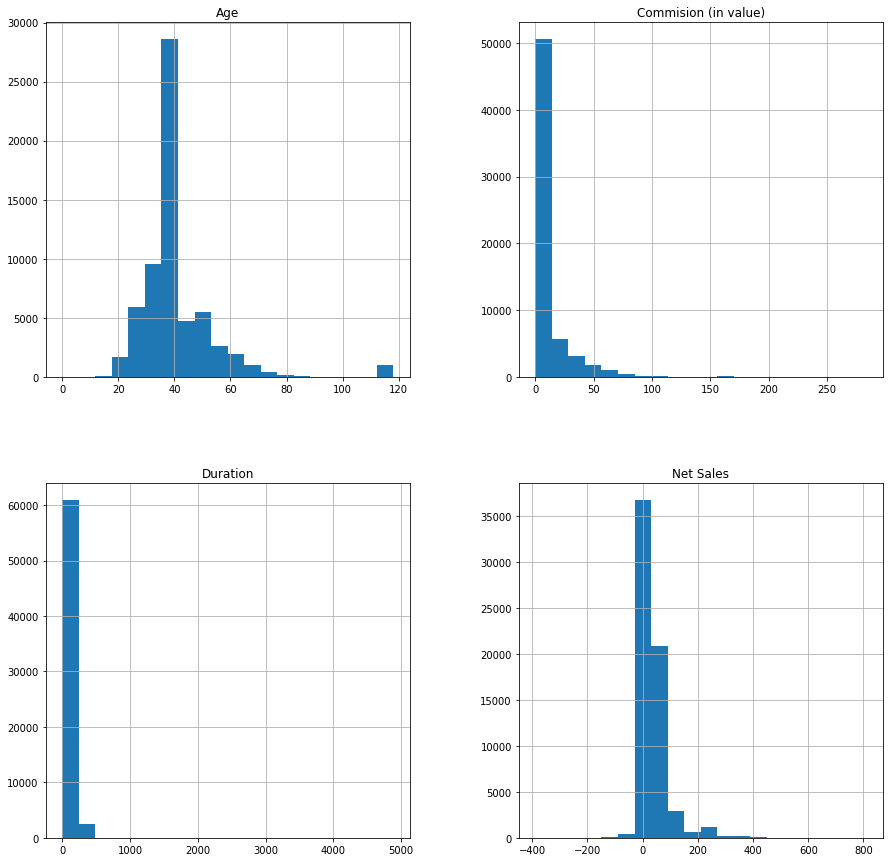

In [27]:
cls_df.hist(bins=20,figsize=(15,15)) 
plt.show()

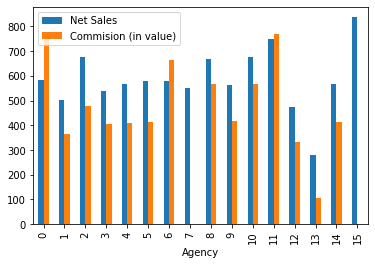

In [28]:
cls_df1=cls.groupby(['Agency']).mean()
bar_plot = cls_df1.plot.bar(y=['Net Sales','Commision (in value)'])

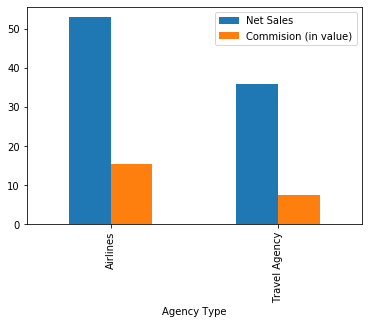

In [29]:
cls_df2=cls_df.groupby(['Agency Type']).mean()
bar_plot = cls_df2.plot.bar(y=['Net Sales','Commision (in value)'])

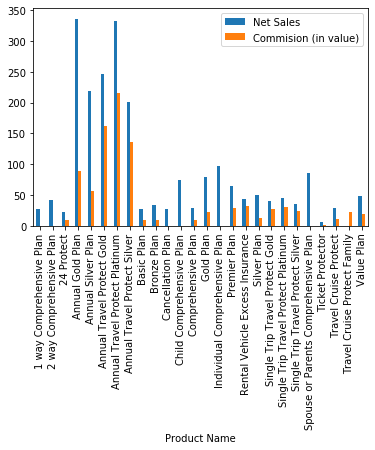

In [30]:
cls_df3=cls_df.groupby(['Product Name']).mean()
bar_plot1 = cls_df3.plot.bar(y=['Net Sales','Commision (in value)'])

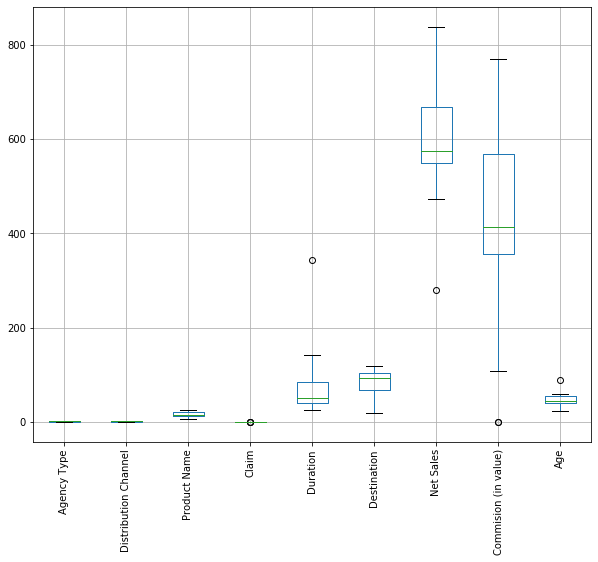

In [31]:
cls_df1.boxplot(rot=90,figsize=(10,8))

### PRELIMINARY OBSERVATIONS

#### Heat Maps and Correlation Matrix:

- There is quite some relevance in product name and commission.
- There is some correlation between duration,age and commission.
- There is some correlation between duration,age and Net Sales.
- Net sales and commission is correlated to some extent.
- Net sales,commission is related to Claim status minorly.
- It can be observed that some attributes such as duration, destination, etc. does not have any impact on claim status.

#### Histograms:

- Data samples mostly belong to the class of people who did not claim the insurance.

#### Bar Plots:

- Net sales as well as commission is higher for airline insurance agencies than travel insurance agencies.
- Agency number 7,15 have no commission.
- Net sales are highest for agency 15 where commission is highest for agency 0(which actually exceeds its net sales).
- The net sales and commission for some products namely Annual Gold Plan and Annual Travel Protect Platinum are significantly high compared to others.

#### Box Plots:

- The quartile range for commission is approx 300-700 and for net sales is approx 500-900.

In [32]:
cls.head()
cls.shape
cls_new1 = cls[cls.Claim == 1]
cls_new2 = cls[cls.Claim == 0]
cls_new2 = cls_new2.sample(n=4000,random_state=100)
cls_new = pd.concat([cls_new1,cls_new2]) 
cls_new = shuffle(cls_new)


In [33]:
t_df = cls_new[['Claim']]
df_cls = cls_new.drop(['Claim'],axis=1)


In [34]:
class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
        NeuralNet.__init__(self, nunits)
        #pass
    
    def softmax(self, z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        expz = np.exp(z) 
        return expz / (np.sum(expz, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(expz))
    
    # Looking at the final summary or comparison table in lecture note,
    # add your codes for forward pass for logistic regression
    def forward(self, X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
                t=self.softmax(t)
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
        return (t, Z)
        #pass

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        return -(np.sum(T*(np.log(Y)))+wpenalty)
        pass

    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        #pass
        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')
                
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(X)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(X)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)
            
        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities     
    def use(self, X):
        Y, Z = self.forward(X)
        l=np.argmax(Y,1)
        return Y,l
        #pass


### Explanation of Codes

There is a NeuralNetLogReg class which has following functions:<br>
init function is a constructor of the class which calls the NeuralNet class' constructor for assigning values to nLayers i.e the number of layers for the model.<br>
_nLayers is the number of hidden unit layers.<br>
rho is the learning rate attribute of the class.<br>
_W is the weights.<br>
_weights is the weights that is _W written in one dimension.<br>
stdX is the standardization class for the data.<br>
stdT is the standardization class for the target.<br>
The train function takes the feautures and the target as the input. The gradientf unpacks the weights,proceeds with the forward pass by calling forward function. Now error is calculated using results of forward pass. Now back propagation is proceeded by calling backward function with parameters as error, Z, T(Target), _lambda<br>
Forward pass in neural network propagates same as in the class discussed above the only difference is that and an additional t=self.softmax(t) is added to the last layer. The last layer will be the softmax function which then gives output to the output layer.<br>
Activation function is used to make the network nonlinear.<br>
In the backward pass the function takes the the z values, Target values and the error as input. Based on the delta value, the weights and the bias are updated accoringly. This method returns the weight vector packed together of that particualr layer. Below are the functions that are excecuted during backward pass.<br>

$$
W \leftarrow W + \alpha_o Zl^\top \Big(  T - g(X)\Big).
$$

$$
 V \leftarrow V + \alpha_h Xl^\top \Big( (T - g(X)) W^\top \odot (1 - Z^2) \Big).
$$

In [35]:
def add_ones(w):
    return np.hstack((np.ones((w.shape[0], 1)), w))

In [36]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

In [37]:
sc=StandardScaler()

### Testing the model with toy data

Text(0.5, 1.0, 'test data set')

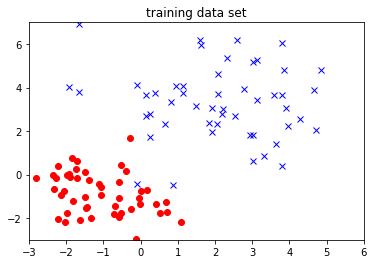

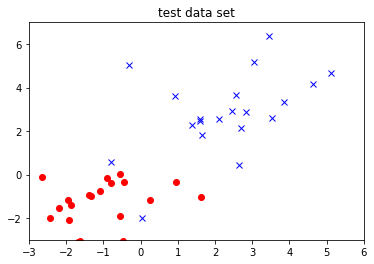

In [61]:
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#
#  Train Data
#
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  # labels are zero or one

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")

In [62]:
clsf = NeuralNetLogReg([2, 4, 2])
clsf.train(Xtrain, Ttrain)
classes, Y = clsf.use(Xtest)

F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


In [64]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [63]:
classes

array([[0.48459343, 0.51540657],
       [0.48615875, 0.51384125],
       [0.48474172, 0.51525828],
       [0.47732131, 0.52267869],
       [0.4806328 , 0.5193672 ],
       [0.48253305, 0.51746695],
       [0.4838356 , 0.5161644 ],
       [0.47203509, 0.52796491],
       [0.47546075, 0.52453925],
       [0.48064966, 0.51935034],
       [0.47531338, 0.52468662],
       [0.48460548, 0.51539452],
       [0.47828047, 0.52171953],
       [0.48663247, 0.51336753],
       [0.47222525, 0.52777475],
       [0.48202755, 0.51797245],
       [0.47777645, 0.52222355],
       [0.47900041, 0.52099959],
       [0.48194839, 0.51805161],
       [0.47332765, 0.52667235],
       [0.50059739, 0.49940261],
       [0.47818534, 0.52181466],
       [0.49852766, 0.50147234],
       [0.50544685, 0.49455315],
       [0.50301598, 0.49698402],
       [0.49962337, 0.50037663],
       [0.48806024, 0.51193976],
       [0.50103604, 0.49896396],
       [0.49210198, 0.50789802],
       [0.51077035, 0.48922965],
       [0.

Accuracy:  50.0 %


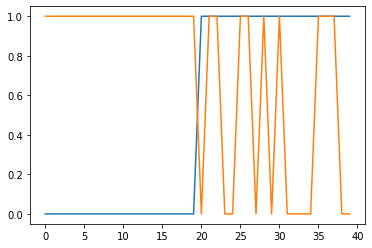

In [65]:
# retrieve labels and plot

plt.plot(Ttest)
plt.plot(Y)

print("Accuracy: ", 100 - np.mean(np.abs(Ttest - Y)) * 100, "%")

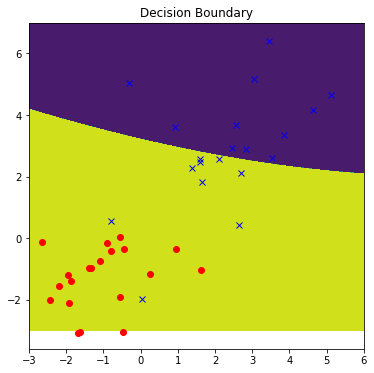

In [66]:
# show me the boundary

x = np.linspace(-3, 6, 1000)
y = np.linspace(-3, 7, 1000)

xs, ys = np.meshgrid(x, y)

X = np.vstack((xs.flat, ys.flat)).T
classes, _ = clsf.use(X)
zs = _.reshape(xs.shape)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, zs.reshape(xs.shape))
plt.title("Decision Boundary")

plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

### Discussion about dummy data
The code works well with 50% accuracy. Hence, we can say that our NeuralNetLogReg class is working.

### Testing on Classification Data

In [77]:
XTrain, XTest, TTrain, TTest = model_selection.train_test_split(df_cls,t_df,test_size=0.20,random_state=17)
TTrain.shape

(3941, 1)

In [78]:
T = add_ones(np.array(TTrain).reshape(-1,1))
(T[:,0])[T[:,1]==1]=0
T

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [79]:
nn = NeuralNetLogReg([9,4,2])
nn.train(sc.fit_transform(XTrain), T, niter=1000) 
p,l = nn.use(sc.fit_transform(XTest))

F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
F:\Ana\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
F:\Ana\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in multiply


## Plots and results

In [80]:
#T_test=np.where(YTest==-1,0,1)
print('F1 score:', f1_score(TTest, l))
print('Accuracy:', accuracy_score(TTest, l))

F1 score: 0.5590778097982709
Accuracy: 0.8448275862068966


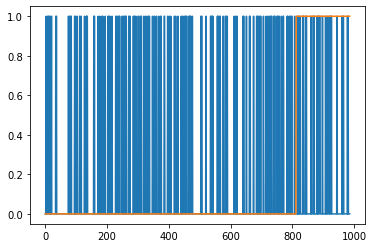

In [81]:
plt.plot(np.sort(TTest))
plt.plot(np.sort(l))

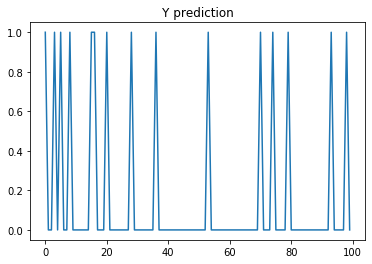

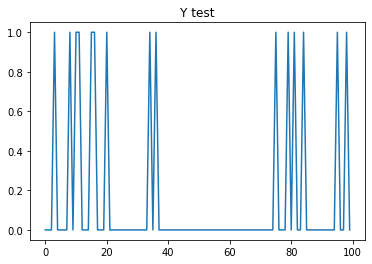

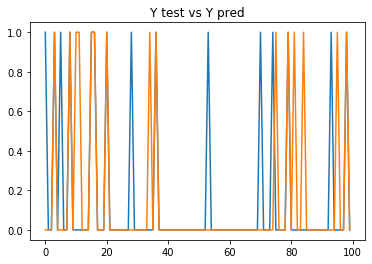

In [82]:
plt.title("Y prediction")
plt.plot(l[0:100])
plt.show()
plt.title("Y test")
plt.plot(np.array(TTest[0:100]))
plt.show()
plt.title("Y test vs Y pred")
plt.plot(l[0:100])
plt.plot(np.array(TTest[0:100]))
plt.show()

In [83]:
cf3=confusion_matrix(TTest, l)
TP=cf3[1][1]
TN=cf3[0][0]
FN=cf3[1][0]
FP=cf3[0][1]
cf3

array([[736,  77],
       [ 76,  97]], dtype=int64)

In [84]:
precision=TP/(TP+FP)
specificity=TN/(TN+FP)
recall=TP/(TP+FN)
print('Precision: ' ,precision)
print('Specificity: ' ,specificity)
print('Recall: ' ,recall)

Precision:  0.5574712643678161
Specificity:  0.9052890528905289
Recall:  0.5606936416184971


Text(0.5, 1, 'Confusion Matrix')

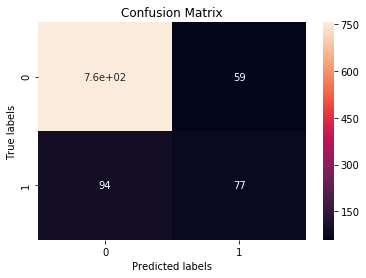

In [52]:
ax= plt.subplot()
sns.heatmap(cf3, annot=True, ax = ax);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')

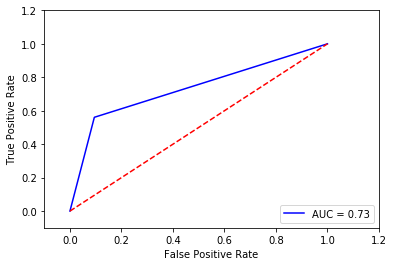

In [85]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(TTest, l)
roc_auc = auc(false_positive_rate, true_positive_rate)

##Plotting now
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Cross Validation code for Non Linear Regression

In [86]:
def split(s):
    avg = len(s) / 5.0
    out = []
    last = 0.0
    while last < len(s):
        out.append(s[int(last):int(last + avg)])
        last += avg
    return out

final_list=[]
best_paramlist=[]
def cross_validate(X, T, parameters):
    partitionedX = split(X)
    partitionedT = split(T)
    for test in range(5): 
        print("test",test)
        Xtest = partitionedX[test]
        Ttest = partitionedT[test]
        j = 0
        
        history_rmse=[]
        params=[]
        for val in range(5): 
            print("val",val)
            if test == val: continue
            
            Xval = partitionedX[val]
            Tval = partitionedT[val]
            
            Xtrain = partitionedX[not test and not val]
            Ttrain = partitionedT[not test and not val]
            
            i = 0
            flist=[]
            paramlist=[]
            for param in parameters:
                
                model = NeuralNetLogReg(param)
                model.train(Xtrain, Ttrain)
                prob,pred = model.use(Xval)
                Tval1=Tval[:,0]
                Tval1=np.where(Tval1==0,1,0)
                valAcc = f1_score(Tval1, pred)
                flist.append(valAcc)
                paramlist.append(param)
            print(flist)
            print(paramlist)
            #avg=sum(rmselist)/len(rmselist)
            #history_rmse.append(avg)
            print(max(flist))
            print(paramlist[np.argmax(flist)])
            history_rmse.append(max(flist))
            params.append(paramlist[np.argmax(flist)])
        print("history_rmse",history_rmse)
        print("params",params)
        #print(rmselist)
        print(history_rmse)
        print(params)
        bestParam = params[np.argmax(history_rmse)]
        print(bestParam)
        bestModel = NeuralNetLogReg(bestParam)
        
        Xtrain = partitionedX[not test]
        Ttrain = partitionedT[not test]
        bestModel.train(Xtrain, Ttrain)

        prob1,finalPred = bestModel.use(Xtest)
        Ttest1=Ttest[:,0]
        Ttest1=np.where(Ttest1==0,1,0)
        myf1 = f1_score(Ttest1, finalPred)
        final_list.append(myf1)
        best_paramlist.append(bestParam)

    return final_list,best_paramlist

### Explanation of code 
Explanation is given at the start of the assignment.
The difference is that we'll be finding the parameters which gives maximum f1 score to our model. We keep on appending it out best list of parameters and best list of f1 score. Below is the implemented version of the CV along with the results of CV.

In [87]:
T = add_ones(np.array(t_df).reshape(-1,1))
(T[:,0])[T[:,1]==1]=0

In [88]:
models = [[9,5,2], [9,7,2],[9,10,2], [9,12,2]]
bestAccuracy,bestParam = (cross_validate(np.array(df_cls), T, models))

test 0
val 0
val 1


F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
F:\Ana\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
F:\Ana\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in multiply


[0.5382716049382715, 0.536231884057971, 0.5319148936170213, 0.558472553699284]
[[9, 5, 2], [9, 7, 2], [9, 10, 2], [9, 12, 2]]
0.558472553699284
[9, 12, 2]
val 2


F:\Ana\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.0, 0.0, 0.0, 0.0]
[[9, 5, 2], [9, 7, 2], [9, 10, 2], [9, 12, 2]]
0.0
[9, 5, 2]
val 3
[0.0, 0.0, 0.0, 0.5185185185185186]
[[9, 5, 2], [9, 7, 2], [9, 10, 2], [9, 12, 2]]
0.5185185185185186
[9, 12, 2]
val 4
[0.0, 0.5309734513274337, 0.5294117647058822, 0.5212765957446809]
[[9, 5, 2], [9, 7, 2], [9, 10, 2], [9, 12, 2]]
0.5309734513274337
[9, 7, 2]
history_rmse [0.558472553699284, 0.0, 0.5185185185185186, 0.5309734513274337]
params [[9, 12, 2], [9, 5, 2], [9, 12, 2], [9, 7, 2]]
[0.558472553699284, 0.0, 0.5185185185185186, 0.5309734513274337]
[[9, 12, 2], [9, 5, 2], [9, 12, 2], [9, 7, 2]]
[9, 12, 2]
test 1
val 0
[0.0, 0.0, 0.6109660574412533, 0.6051282051282051]
[[9, 5, 2], [9, 7, 2], [9, 10, 2], [9, 12, 2]]
0.6109660574412533
[9, 10, 2]
val 1
val 2
[0.49844236760124605, 0.0, 0.5142857142857142, 0.5080385852090032]
[[9, 5, 2], [9, 7, 2], [9, 10, 2], [9, 12, 2]]
0.5142857142857142
[9, 10, 2]
val 3
[0.0, 0.0, 0.0, 0.525]
[[9, 5, 2], [9, 7, 2], [9, 10, 2], [9, 12, 2]]
0.525
[9, 12, 2]
val 4


In [89]:
print(bestAccuracy)
print(bestParam)

[0.0, 0.521091811414392, 0.3290043290043289, 0.5171339563862928, 0.5250737463126843]
[[9, 12, 2], [9, 10, 2], [9, 12, 2], [9, 12, 2], [9, 12, 2]]


In [90]:
T = add_ones(np.array(TTrain).reshape(-1,1))
T=T.astype(int)
(T[:,0])[T[:,1]==1]=0
T.shape

(3941, 2)

In [91]:
nn = NeuralNetLogReg([9,12,2])
nn.train(sc.fit_transform(XTrain), T,optim='scg') 
p,l = nn.use(sc.fit_transform(XTest))


F:\Ana\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
F:\Ana\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
F:\Ana\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
F:\Ana\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in multiply


In [92]:
y_test1=np.where(TTest==-1,0,1)
print('F1 score:', f1_score(y_test1, l))
print('Accuracy:', accuracy_score(y_test1, l))

F1 score: 0.2671353251318102
Accuracy: 0.15415821501014199


### Discussions about parameter/network structure choice¶

In this assignment I built 12 layere neural network. Input layer has 9 nodes because there are 9 features in my data that are actually useful. Output layer has 2 node.

I've not only used 12 layers. But I repeated the process with many layers and it was interesting to find that 12 layers give better results and it keeps on improving with more layers. This might not be true because it might lead to overfitting of data. But for my case, 12 layers seems to be the best fit for my dataset.

I tried for the best network structure by changing the number of nodes in hidden layer. I performed 5 fold cross validation by passing my models variable as [[9,5,2], [9,7,2],[9,10,2], [9,12,2]]. Here first value represents input nodes, second value represents nodes in hidden layer, third value represents output nodes.

From the results of cross validation we can see that model [9,12,2] has appeared more number of times. The f1 score values returned for [9,12,2] in the final result are [0.0, 0.3290043290043289, 0.5171339563862928, 0.5250737463126843], and for [9, 10, 2] as 0.521091811414392. 

The model with number of nodes in hidden layer 12 works better. With increasing layer the model keeps on improving With more number of nodes in hidden layer network its overfitting the data.

Hence, I've used [9,12,2] as the final structure and I got F1 score: 0.267135325131810 and Accuracy: 0.15415821501014199


### Discussion about the prediction results

In this assignment I have performed nonlinear logistic regression analysis using Neural network which is nonlinear regression problem. On training the model using NeuralNetLogReg with optimum structure [9,12,2], model has produced F1 score: 0.267135325131810 and Accuracy: 0.15415821501014199 with optim="scg."

We are free to choose hidden layers, hidden nodes that suits our problem. Each node is connected to a activation function which makes the network more powerful. I used softmax as activation function at last layer. The gradient is updating the weights in each layer during back propagation which made network work so well.

I tried with 12 layers and I got 0.15415821501014199 as accuracy. For increasing number of layers, the model is improving as well. This means that with more layers the model will give more accuracy but it is not true since it may overfit the data. Hence, I left this with 12 layers as the best number of layers for this dataset.



# Conclusions

In this assignment, I understood neural network and its implementation. This assignmet taught me how neural network are better at handling complex problems. We have to be careful with number of hidden layers because it might overfit the data if we take large number of hidden layers. Moreover, I learned how cross-validation can be used to find the best parameters.<br> 
Challenge: Working with unbalanced dataset is something that I learned.

## References

1. "seaborn: statistical data visualization",https://seaborn.pydata.org/
2. "Kaggle: Travel Insurance Dataset", https://www.kaggle.com/mhdzahier/travel-insurance
3. "Pandas", https://pandas.pydata.org/
4. "class note Neural Networks", https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Neural%20Networks.ipynb
5. "Class note Non linear logistic regression", https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-NonlinearLogReg.ipynb
6. "Artificial Neural Network", https://en.wikipedia.org/wiki/Artificial_neural_network
7. "A Gentle Introduction to k-fold Cross-Validation", https://machinelearningmastery.com/k-fold-cross-validation/#:~:targetText=Cross%2Dvalidation%20is%20a%20resampling,k%2Dfold%20cross%2Dvalidation.

# Extra Credit

Now you are testing various **activation functions** in this section. Use the best neural network structure and explore 3 different activation functions of your choice (one should be *tanh* that you used in the previous sections). 
You should use cross validation to discover the best model (with activation function). 


One extra credit is assigned when you finish the work completely. 


# How to start?

* Download [a3.tgz](http://webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/assign/a3.tgz). 
* Unzip the python files to current working directory.
* Import the necessary classes or functions including NeuralNet.

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
40 | Methods | 
 | 10| Summary of CV & correctness of implementation
 | 5| Summary of nonlinear regression 
 | 5| Explanation of codes
 | 5| Summary of nonlinear logistic regression 
 | 5| Explanation of codes
 |10| Examination of correct implementation (NonlinearLogReg) with toy data.
40 | Results | Your Data
| 10| Presentaion of CV results
| 10| Discussions about parameter/network structure choice 
| 10| plots for results
| 10| Discussion about the prediction results. Try to analyze what nonlinear regression model learned. 
5 | Conclusions 
